<a href="https://colab.research.google.com/github/miraytopal/Turkey-Earthquake-Tweets-Sentiment-Analysis/blob/main/sentiment_analysis_notebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model

In [ ]:
# We'll use a model based on the bilingual language model
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-xlm-roberta-base-sentiment")
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-xlm-roberta-base-sentiment")
sa = pipeline("sentiment-analysis", tokenizer=tokenizer, model=model)

In [ ]:
pre_twit = preprocess_tweet(df.loc[1201].content)
print(pre_twit)
p = sa(pre_twit)
print(p)

hatayda deprem anı çok korkutucu gerçekten bu deprem travmalarını nasıl
[{'label': 'negative', 'score': 0.9467036724090576}]


In [ ]:
def get_sentiment_analysis(tweet):
    p = sa(str(tweet))  # sa pipeline
    return pd.Series([p[0]["label"], round(p[0]["score"],4)])

In [ ]:
get_sentiment_analysis(df['content'])

0    negative
1      0.4120
dtype: object

###Sentiment Analysis




In [ ]:
df["sentiment_label"] = "-"
df["sentiment_score"] = -1
df[["sentiment_label", "sentiment_score"]] = df["content"].progress_apply(get_sentiment_analysis)

  0%|          | 0/132934 [00:00<?, ?it/s]

In [ ]:
# distribution of sentiment_labels
temp = df.groupby('sentiment_label').count()['content'].reset_index().sort_values(by='content',ascending=False)
temp.style.background_gradient(cmap='Purples')

In [ ]:
df['sentiment_score'].apply(lambda x: float(x)).head()

180   0.5588
192   0.9200
213   0.8577
219   0.9250
257   0.7259
Name: sentiment_score, dtype: float64

In [ ]:
df_positive = df[df["sentiment_label"]=="positive"]
df_positive.head()

date                                            content  \
267  2023-02-21  taner savut 9899 yıllarında joachim beğendiği ...   
409  2023-02-20                                   pray for türkiye   
414  2023-02-20                                   pray for türkiye   
433  2023-02-20  çok geçmiş olsun türkiye ve dünyaın herkes sen...   
584  2023-02-20  depremden önce allah korusun inşallah bir şey ...   

                                              hashtags  like_count  rt_count  \
267  ['samandag', 'depremoldu', 'Turkey', 'earthqua...      0.0000    0.0000   
409  ['AnotherEarthquake', 'earthquake', 'TurkeyEar...      1.0000    0.0000   
414  ['AnotherEarthquake', 'earthquake', 'TurkeyEar...      2.0000    1.0000   
433  ['Turkey', 'depremadana', 'earthquake', 'Hatay...      0.0000    0.0000   
584  ['deprem', 'hatay', 'syria', 'suriye', 'bugün'...      2.0000    0.0000   

     followers_count isVerified language coordinates place  \
267       11431.0000      False       tr         NaN   NaN   
409          19.0000      False       tr         NaN   NaN   
414          19.0000      False       tr         NaN   NaN   
433           3.0000      False       tr         NaN   NaN   
584           9.0000      False       tr         NaN   NaN   

                  source sentiment_label  sentiment_score  
267   Twitter for iPhone        positive           0.6579  
409  Twitter for Android        positive           0.3649  
414  Twitter for Android        positive           0.3649  
433  Twitter for Android        positive           0.8389  
584  Twitter for Android        positive           0.4101

In [ ]:
df_negative = df[df["sentiment_label"]=="negative"]
df_negative.head()

date                                            content  \
192  2023-02-21  vatan hainleri yine tag en okullar açik açik m...   
213  2023-02-21                                     bizi sal artık   
219  2023-02-21  türkiyenin güneyi ve suriyede büyüklüğündeki d...   
257  2023-02-21  selocum onlar istifa devlet malı deniz yemeyen...   
280  2023-02-21  bu ülkede geçer dediğimiz hiç bi şey geçmiyor ...   

                                              hashtags  like_count  rt_count  \
192  ['70ildeOkullarKapatılsın', 'deprem', 'earthqu...      3.0000    1.0000   
213  ['earthquake', 'turkeyearthquake2023', 'Turkey...      0.0000    0.0000   
219                  ['Turkey', 'earthquake', 'Syria']      0.0000    0.0000   
257  ['earthquake', 'Erdbeben', 'depremoldu', 'Turk...      0.0000    0.0000   
280                           ['earthquake', 'Turkey']      5.0000    0.0000   

     followers_count isVerified language  \
192           0.0000      False       tr   
213        1252.0000      False       tr   
219        3338.0000      False       tr   
257         297.0000      False       tr   
280        1998.0000      False       tr   

                                           coordinates  \
192                                                NaN   
213                                                NaN   
219                                                NaN   
257  Coordinates(longitude=40.149462, latitude=37.8...   
280                                                NaN   

                                                 place               source  \
192                                                NaN   Twitter for iPhone   
213                                                NaN  Twitter for Android   
219                                                NaN  Twitter for Android   
257  Place(fullName='Diyarbakır, Türkiye', name='Di...  Twitter for Android   
280                                                NaN   Twitter for iPhone   

    sentiment_label  sentiment_score  
192        negative           0.9200  
213        negative           0.8577  
219        negative           0.9250  
257        negative           0.7259  
280        negative           0.8951

In [ ]:
df_neutral = df[df["sentiment_label"]=="neutral"]
df_neutral.head()

date                                            content  \
180  2023-02-21  hayatını kaybeden çocukların anısına bazı enka...   
363  2023-02-20  bu akşam da saat büyüklüğündeki depremin yaşan...   
600  2023-02-20  nasıl bir güce sahip olduğu anlamak güç ayrı ü...   
761  2023-02-20  adıyaman merkezde tane çadır ihtiyacımız var e...   
782  2023-02-20  hataysamandağ acilçadır hataydefne acilçadırya...   

                                              hashtags  like_count  rt_count  \
180  ['earthquake', 'DEPREMANI', 'depremoldu', 'dep...      1.0000    0.0000   
363  ['Deprem', 'hatay', 'İdlib', 'Earthquake', 'Id...      1.0000    0.0000   
600  ['Hatay', 'deprem', 'suriye', 'Lübnan', 'İsrai...      0.0000    0.0000   
761  ['earthquake', 'Turkey', 'hatay', 'defne', 'de...     10.0000   12.0000   
782  ['deprem', 'earthquake', 'TurkeyEarthquake', '...      0.0000    0.0000   

     followers_count isVerified language coordinates place  \
180         149.0000      False       tr         NaN   NaN   
363          90.0000      False       tr         NaN   NaN   
600         705.0000      False       tr         NaN   NaN   
761        1575.0000      False       tr         NaN   NaN   
782          84.0000      False       tr         NaN   NaN   

                  source sentiment_label  sentiment_score  
180  Twitter for Android         neutral           0.5588  
363      Twitter Web App         neutral           0.7822  
600  Twitter for Android         neutral           0.6058  
761  Twitter for Android         neutral           0.5274  
782  Twitter for Android         neutral           0.3856

In [ ]:
print("total number: ",len(df))
print("positive number: ",len(df_positive))
print("negative number: ", len(df_negative))
print("neutral number: ", len(df_neutral))
print("**********************")
print("% of positive: ",round(100*len(df_positive)/len(df),2))
print("% of negative: ",round(100*len(df_negative)/len(df),2))
print("% of neutral: ",round(100*len(df_neutral)/len(df),2))

total number:  132934
positive number:  12158
negative number:  69830
neutral number:  50946
**********************
% of positive:  9.15
% of negative:  52.53
% of neutral:  38.32


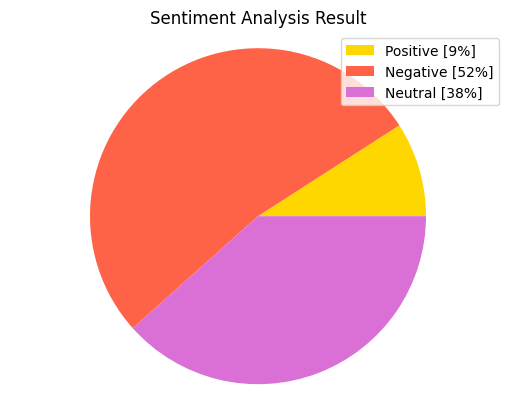

In [ ]:
positive = int(100*len(df_positive)/len(df))
negative = int(100*len(df_negative)/len(df))
neutral = int(100*len(df_neutral)/len(df))

labels = [f'Positive [{str(positive)}%]', f'Negative [{str(negative)}%]', f'Neutral [{str(neutral)}%]']

sizes = [positive, negative, neutral]
colors = ['gold','tomato','orchid']

patches, texts = plt.pie(sizes,colors=colors)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result")
plt.axis("equal")
plt.show()

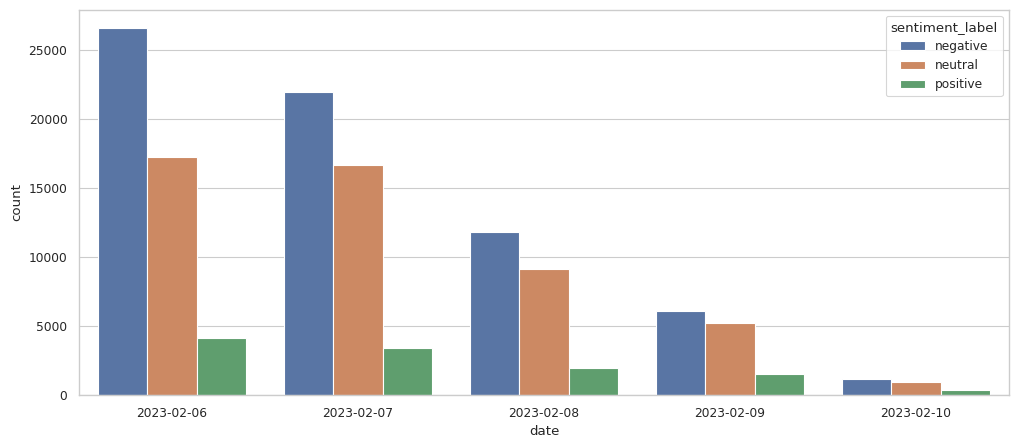

In [ ]:
# distribution of sentiment labels by day
tweets_agg_df = df.groupby(["date", "sentiment_label"])["hashtags"].count().reset_index()[0:15]
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x = 'date', y = 'count', hue = 'sentiment_label', data = tweets_agg_df);

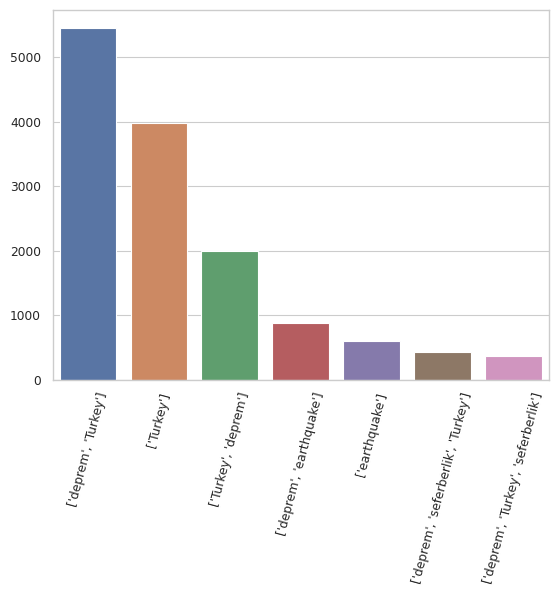

In [ ]:
# top trending hashtags
hashtags = df['hashtags'].value_counts().nlargest(7)
sns.barplot(x=hashtags.index, y=hashtags.values)
plt.xticks(rotation=75)
plt.show()

In [ ]:
# turkish stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('turkish'))
print(STOPWORDS)

# adding missing stopwords
STOPWORDS.update(('türkiye','deprem','hiçbir', 'bir', 'the', 'to', 'kadar'))

{'hiç', 'ne', 'ama', 'çok', 'aslında', 'acaba', 'şu', 'ise', 'eğer', 'veya', 'belki', 'bu', 'nasıl', 'az', 'neden', 'kim', 'ile', 'tüm', 'ya', 'mı', 'en', 'ki', 'o', 'bazı', 'yani', 'da', 'de', 'gibi', 'birşey', 'biri', 'mu', 'için', 'nereye', 'siz', 've', 'çünkü', 'hem', 'kez', 'nerde', 'biz', 'birkaç', 'her', 'nerede', 'diye', 'hep', 'niçin', 'daha', 'hepsi', 'mü', 'defa', 'sanki', 'şey', 'niye'}


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def generate_word_cloud(tweets, status):

    print(len(tweets))

    wordcloud = WordCloud(max_words = 500,
        width=800, 
        height=400,
        background_color = 'black',
        stopwords = STOPWORDS).generate(str(tweets))
    
    plt.figure(figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [ ]:
def generate_word_cloud_from_frequencies(freq_dict, status):

    print(len(fdist_filtered))

    wordcloud = WordCloud(
        width=800, 
        height=400,
        background_color = 'black',
        stopwords = STOPWORDS).generate_from_frequencies(frequencies=freq_dict)
    
    plt.figure(figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [ ]:
tweet_positive_texts = " ".join(t for t in df_positive.content)
print("All positive tweets consist of {0} words".format(len(tweet_positive_texts)))

All positive tweets consist of 958343 words


In [ ]:
tweet_negative_texts = " ".join(t for t in df_negative.content)
print("All negative tweets consist of {0} words".format(len(tweet_negative_texts)))

All negative tweets consist of 6942138 words


In [ ]:
tweet_all_texts = " ".join(t for t in df.content)
print("All tweets consist of {0} words.".format(len(tweet_all_texts)))

All tweets consist of 11816053 words.


In [ ]:
token_positive_words = word_tokenize(tweet_positive_texts)
print(token_positive_words)
print(len(token_positive_words))

['taner', 'savut', '9899', 'yıllarında', 'joachim', 'beğendiği', 've', 'oynattığı', 'oyunculardandı', 'mekanı', 'cennet', 'olsun', 'ali', 'koç', 'pray', 'for', 'türkiye', 'pray', 'for', 'türkiye', 'çok', 'geçmiş', 'olsun', 'türkiye', 've', 'dünyaın', 'herkes', 'senin', 'için', 'güçlü', 'kal', 'depremden', 'önce', 'allah', 'korusun', 'inşallah', 'bir', 'şey', 'olmaz', 'ama', 'tedirginim', 'gider', 'ya', 'allah', 'dualarını', 'kabul', 'hasbunallah', 'another', 'earthquake', 'hits', 'southern', 'turkey', 'yüce', 'allah', 'hastalara', 'acil', 'şifalar', 'ölenlere', 'cenneti', 'nasib', 'türkiye', 'iyi', 'müslümanlarla', 'dolu', 'bir', 'türkiyeyi', 'gerçekten', 'allah', 'ülkenin', 'yardımcısı', 'allahim', 'sen', 'yardimcisi', 'vatanimizi', 'senden', 'başkasina', 'muhtaç', 'etme', 'dualarım', 'türkiye', 'ile', 'ya', 'allah', 'türkiyeye', 'rahmet', 'eylesin', 'again', 'allahım', 'sen', 'bizi', 'koru', 'sallanma', 'başlamadan', 'elektrik', 'neden', 'sonra', 'gökyüzüm', 'aydınlanıyor', 'allah', 

In [ ]:
print(len(token_positive_words))

135769


In [ ]:
clean_token_positive_words = [w for w in token_positive_words if not w in stop_words and len(w)>1]
print(clean_token_positive_words)
print(len(clean_token_positive_words))

['taner', 'savut', '9899', 'yıllarında', 'joachim', 'beğendiği', 'oynattığı', 'oyunculardandı', 'mekanı', 'cennet', 'olsun', 'ali', 'koç', 'pray', 'for', 'pray', 'for', 'geçmiş', 'olsun', 'dünyaın', 'herkes', 'senin', 'güçlü', 'kal', 'depremden', 'önce', 'allah', 'korusun', 'inşallah', 'olmaz', 'tedirginim', 'gider', 'allah', 'dualarını', 'kabul', 'hasbunallah', 'another', 'earthquake', 'hits', 'southern', 'turkey', 'yüce', 'allah', 'hastalara', 'acil', 'şifalar', 'ölenlere', 'cenneti', 'nasib', 'iyi', 'müslümanlarla', 'dolu', 'türkiyeyi', 'gerçekten', 'allah', 'ülkenin', 'yardımcısı', 'allahim', 'sen', 'yardimcisi', 'vatanimizi', 'senden', 'başkasina', 'muhtaç', 'etme', 'dualarım', 'allah', 'türkiyeye', 'rahmet', 'eylesin', 'again', 'allahım', 'sen', 'bizi', 'koru', 'sallanma', 'başlamadan', 'elektrik', 'sonra', 'gökyüzüm', 'aydınlanıyor', 'allah', 'sonumuzu', 'pray', 'for', 'turkey', 'allah', 'hifazat', 'farma', 'hatayda', 'bal', 'gücünde', 'allah', 'özü', 'olsun', 'bilimin', 'dini',

In [ ]:
d = Counter(fdist_filtered_positive)
d.most_common(20)

[('olsun', 2641),
 ('allah', 2021),
 ('yardım', 1283),
 ('güzel', 900),
 ('sen', 879),
 ('geçmiş', 817),
 ('rabbim', 628),
 ('allahım', 620),
 ('iyi', 522),
 ('razı', 520),
 ('var', 512),
 ('lütfen', 497),
 ('enkaz', 434),
 ('büyük', 427),
 ('birlikte', 421),
 ('gün', 401),
 ('teşekkürler', 391),
 ('sağ', 390),
 ('yardim', 363),
 ('devam', 351)]

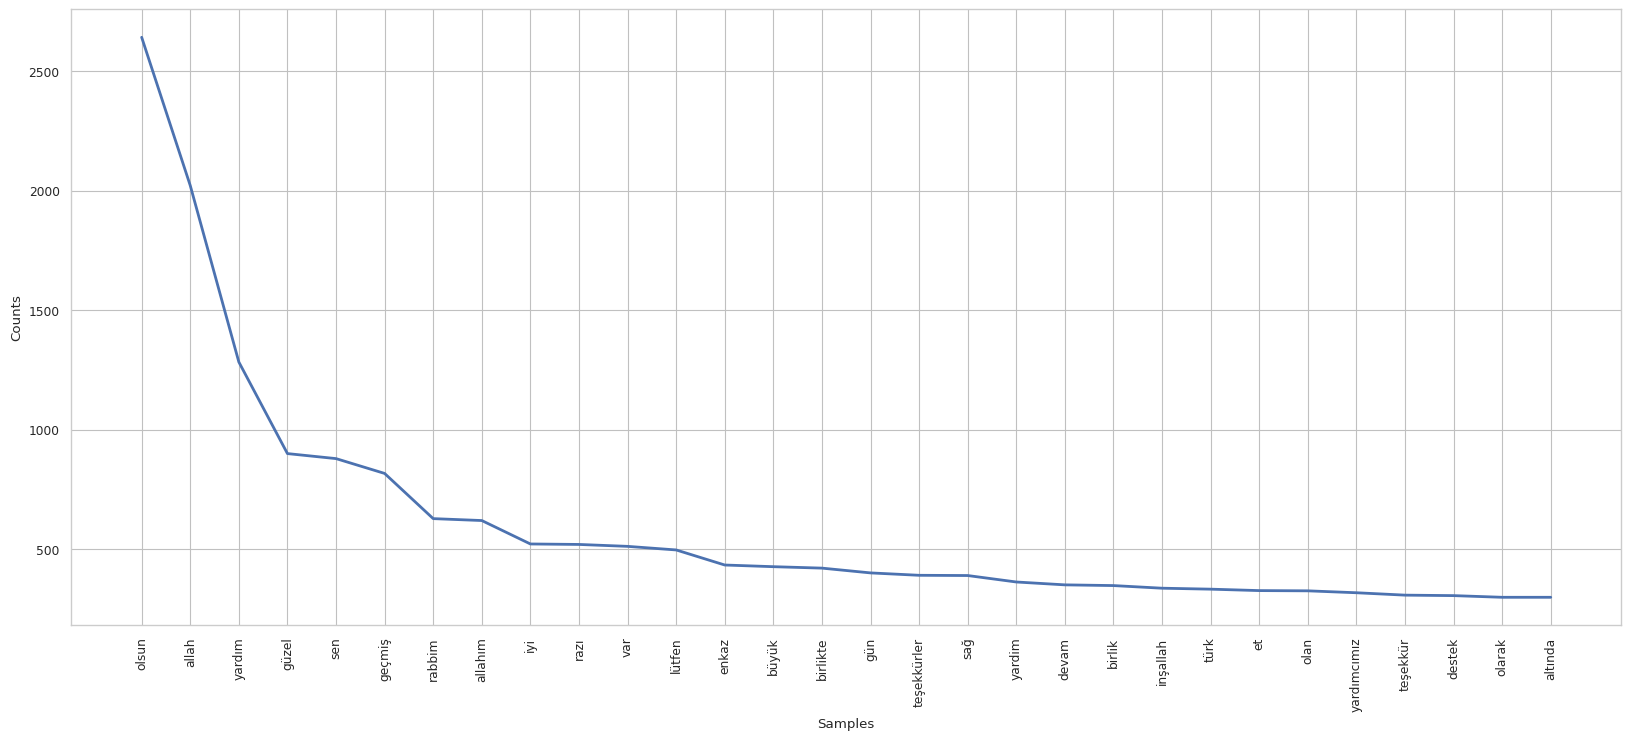

In [ ]:
fdist_filtered_positive = FreqDist(clean_token_positive_words)  # kelime listesini gruplayıp saymak için bir kütüphane
plt.figure(figsize=(20, 8))
fdist_filtered_positive.plot(30);

108013


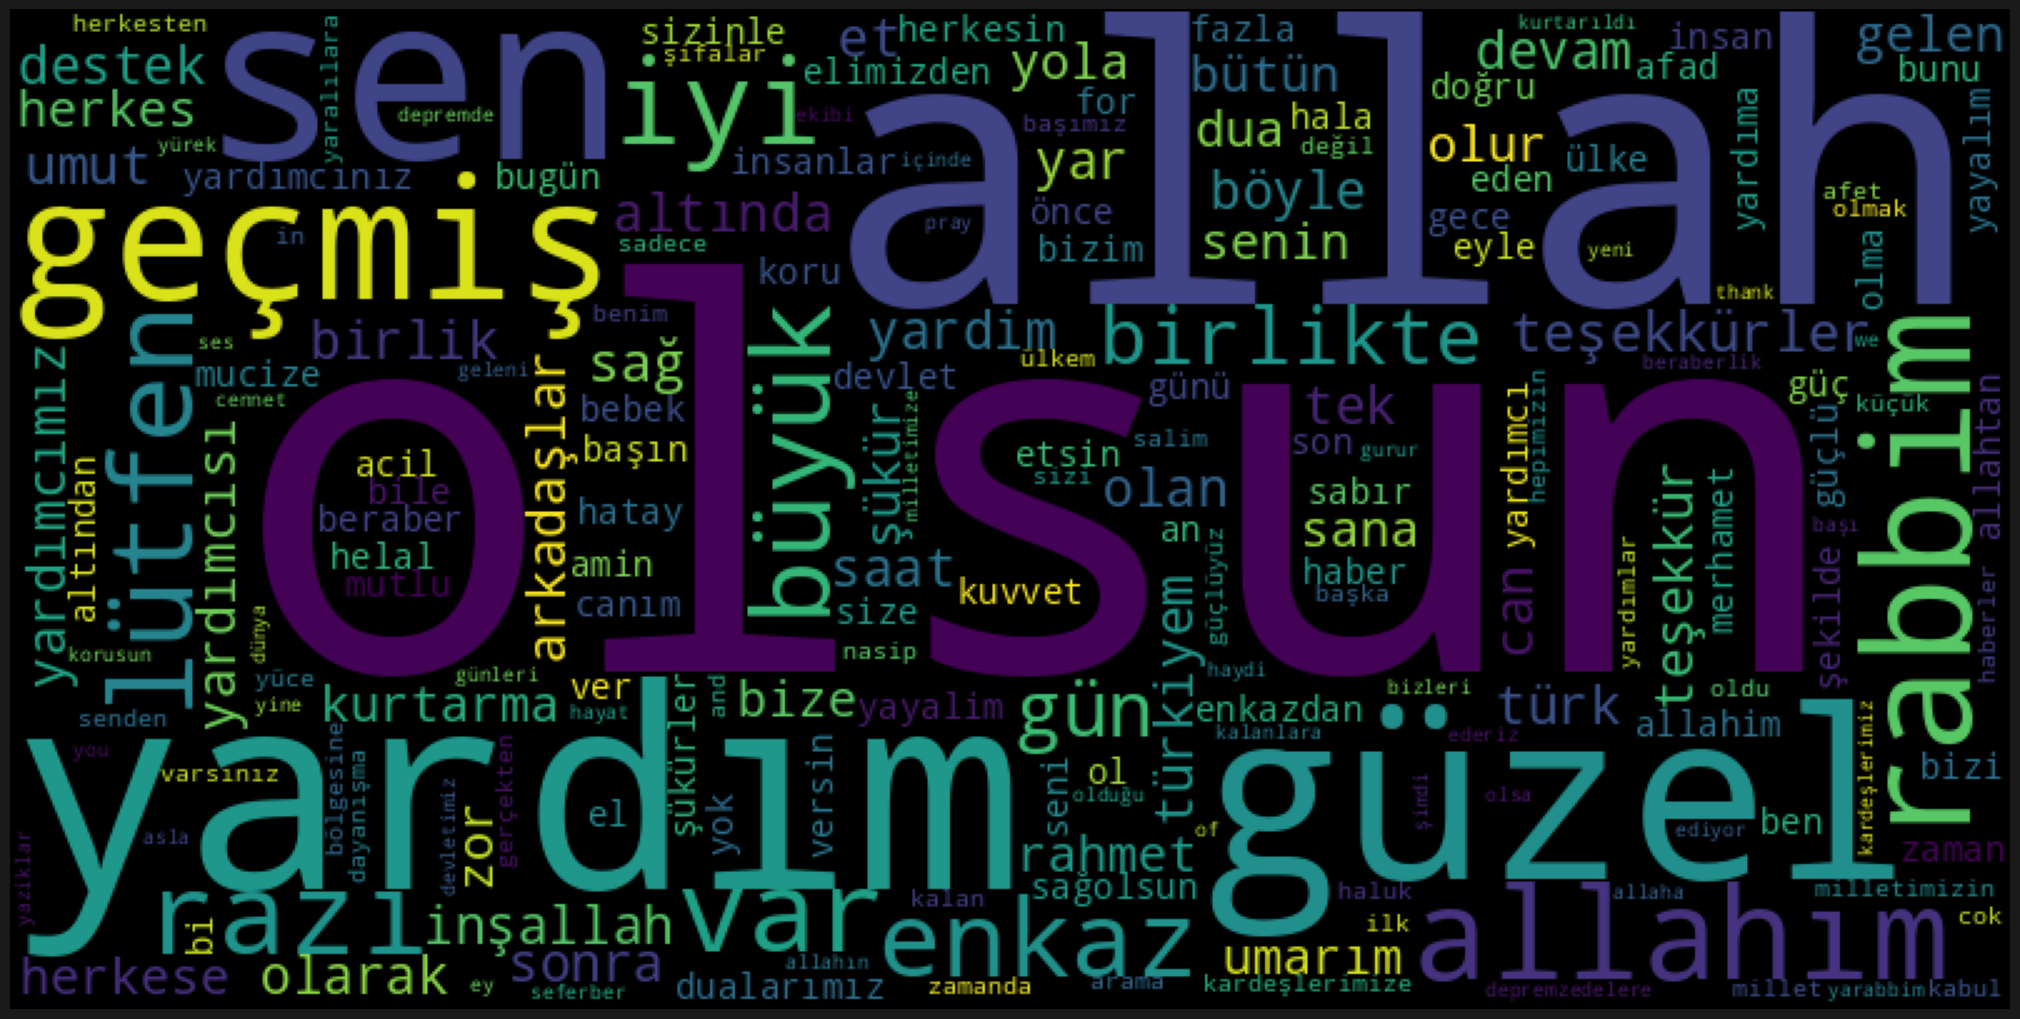

In [ ]:
generate_word_cloud_from_frequencies(fdist_filtered_positive, "positive")

In [ ]:
token_negative_words = word_tokenize(tweet_negative_texts)
print(token_negative_words)
print(len(token_negative_words))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
clean_token_negative_words = [w for w in token_negative_words if not w in stop_words and len(w)>1]
print(clean_token_negative_words)
print(len(clean_token_negative_words))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
d = Counter(fdist_filtered_negative)
d.most_common(20)

[('lütfen', 16726),
 ('yardım', 16497),
 ('enkaz', 7159),
 ('var', 6406),
 ('yok', 6277),
 ('altında', 5823),
 ('hatay', 5123),
 ('yardim', 4945),
 ('allah', 4736),
 ('hala', 4152),
 ('edin', 3944),
 ('haber', 3774),
 ('insanlar', 3737),
 ('acil', 3528),
 ('olsun', 3301),
 ('mahallesi', 3284),
 ('olan', 2435),
 ('göçük', 2249),
 ('bile', 2215),
 ('insan', 2184)]

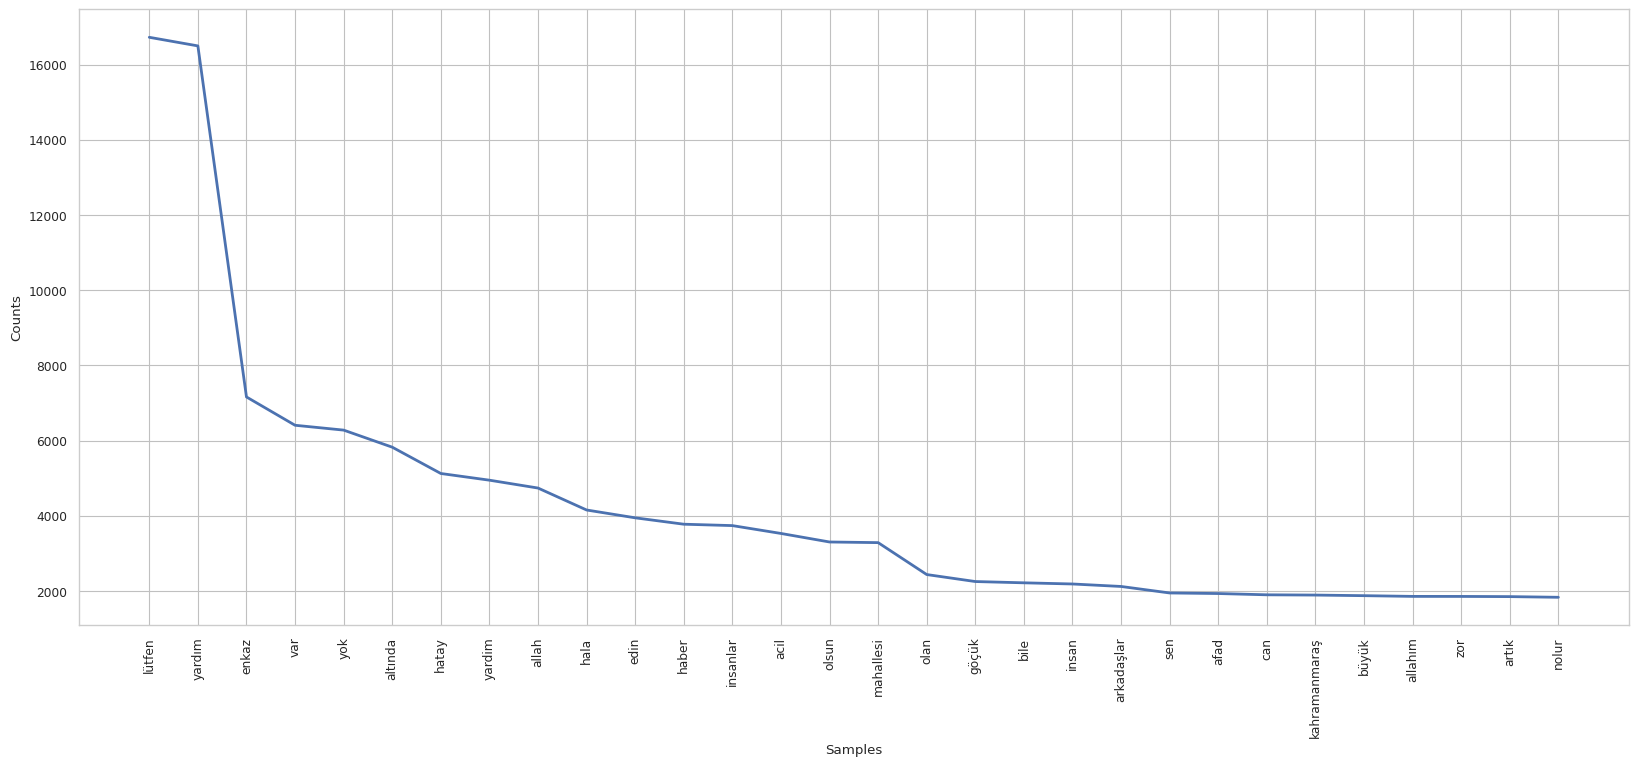

In [ ]:
fdist_filtered_negative = FreqDist(clean_token_negative_words)
plt.figure(figsize=(20, 8))
fdist_filtered_negative.plot(30);

108013


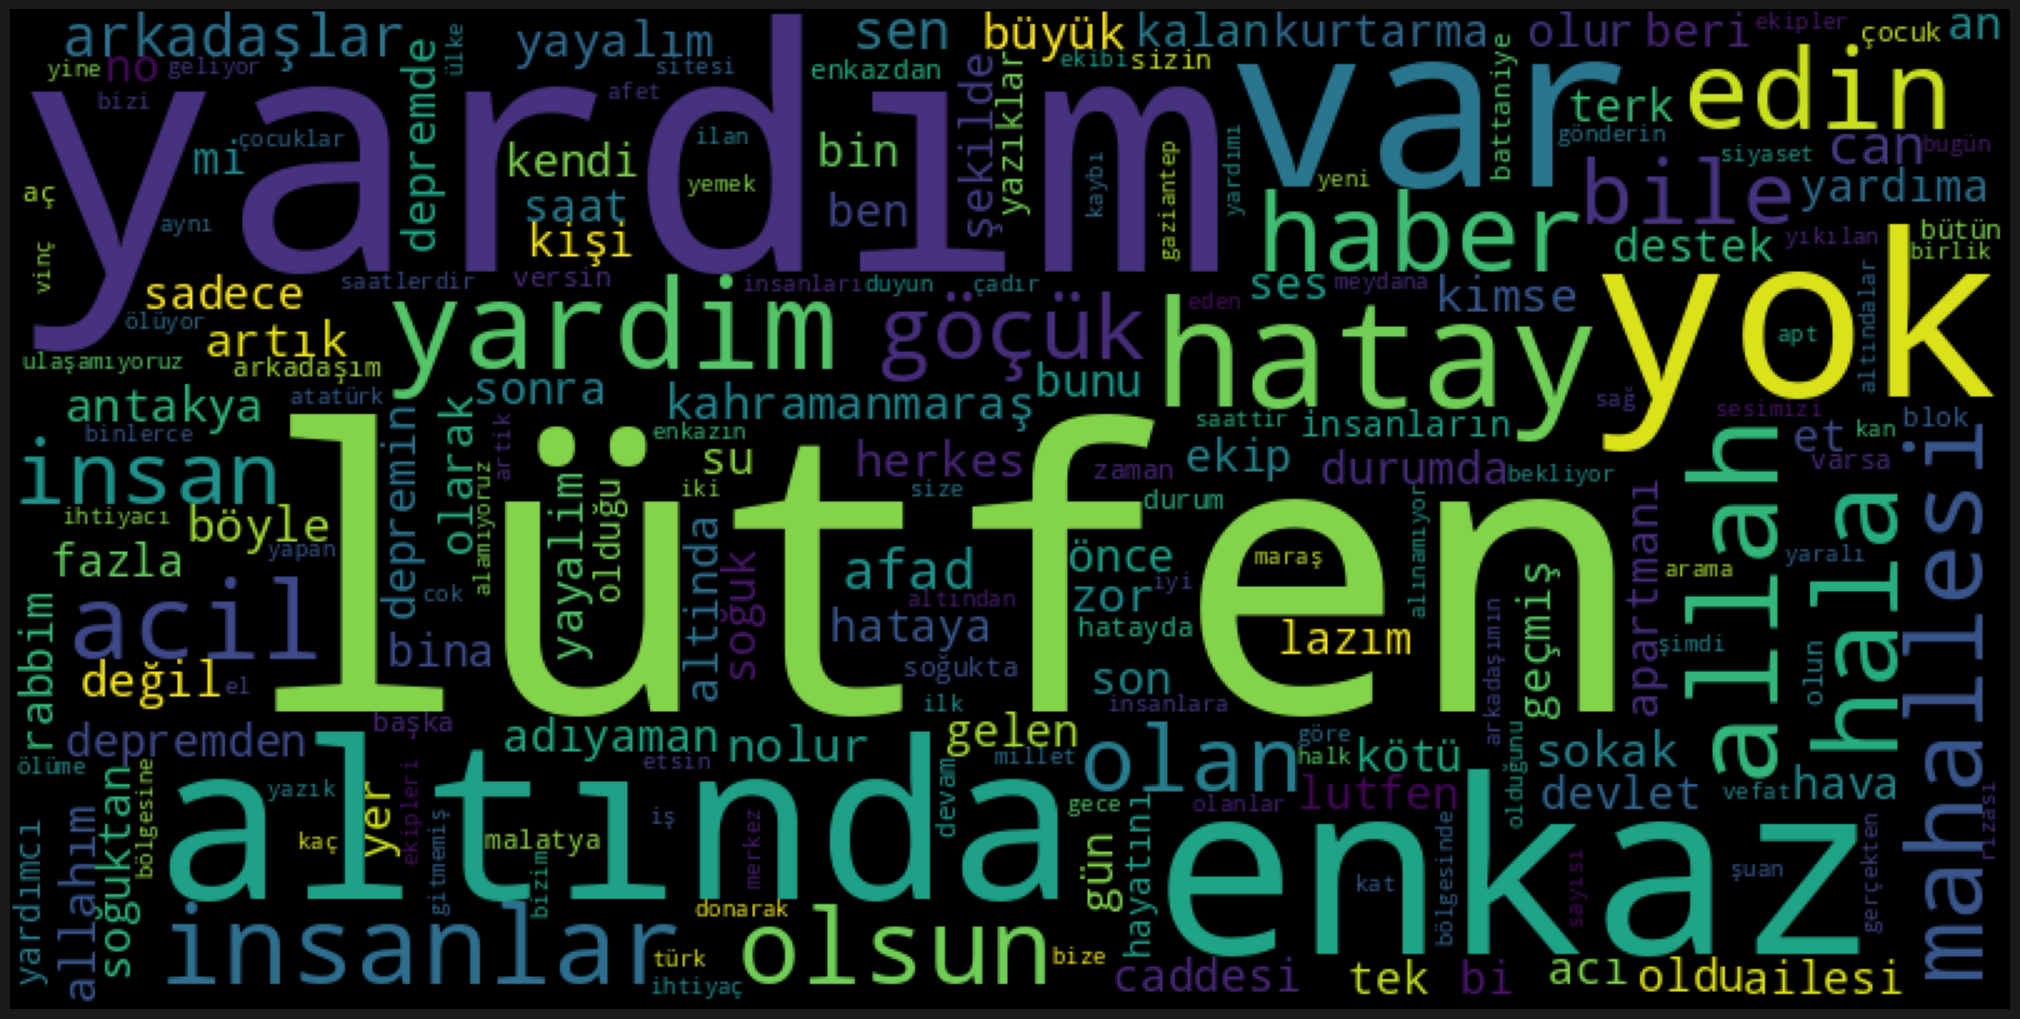

In [ ]:
generate_word_cloud_from_frequencies(fdist_filtered_negative, "negative")